In [1]:
import sys
sys.path.append("../")
import os
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np

In [2]:
def draw_loss(temp, ax, title):
    temp = pd.read_csv(temp)
    ax.plot(temp.epoch, temp.train_ls, label='trainning loss')
    ax.plot(temp.epoch, temp.test_ls, label='test loss')
    ax.legend()
    ax.title.set_text(title)
    
def draw_acc(temp, ax, title):
    temp = pd.read_csv(temp)
    ax.plot(temp.epoch, temp.test_acc, label='test_accuracy')
    ax.legend()

## Hyperparams compare

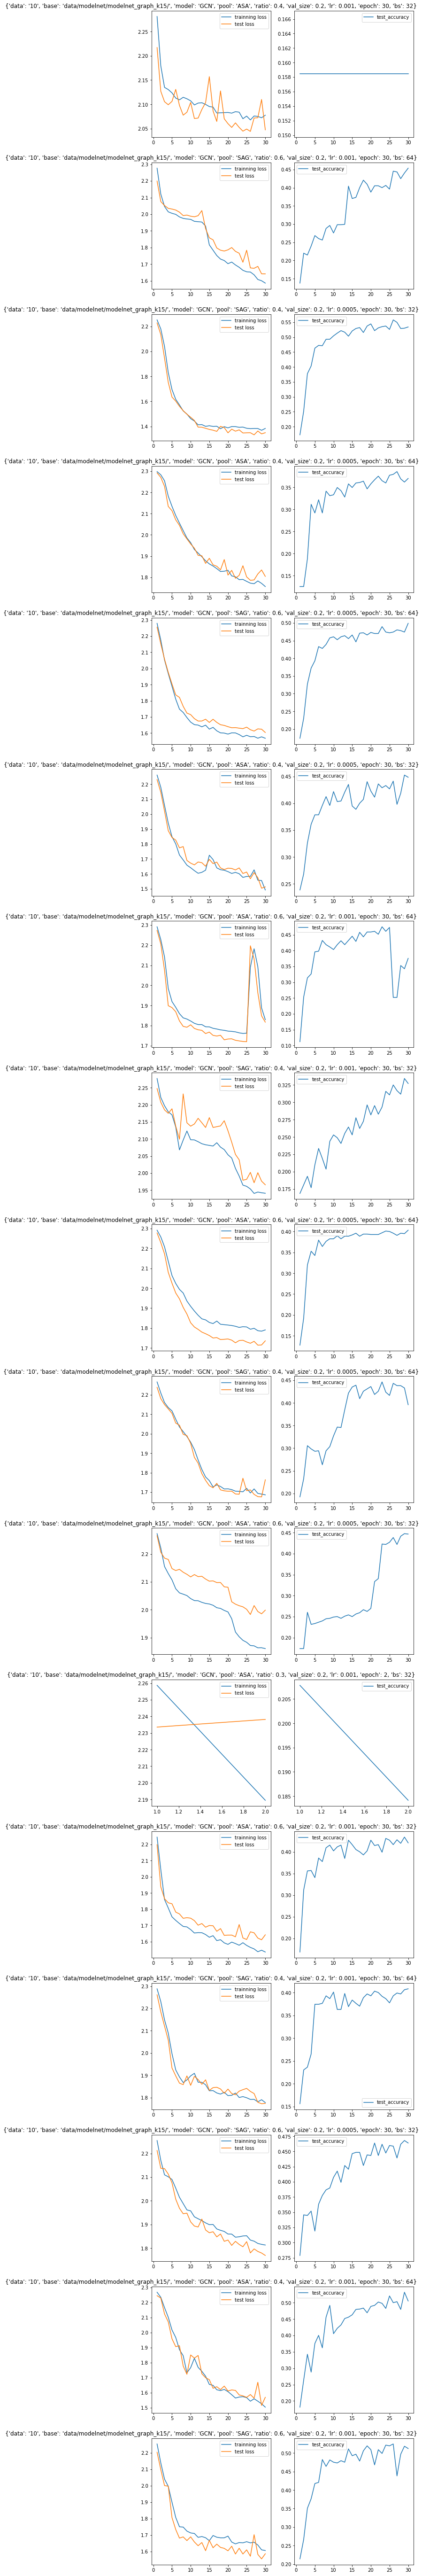

In [4]:
base = '../config/model_results/GCN_k_15/10/'
para_base = '../config/model_params/GCN_k_15/10/'
fig, ax = plt.subplots(17, 2, figsize=(10, 100))
for obj, i in zip(os.listdir(base), range(len(os.listdir(base)))):
    param = para_base + obj[:-4] +'.json'
    with open(param, 'r') as file:
        title = str(json.load(file))
    temp = base + obj
    draw_loss(temp, ax[i][0], title)
    draw_acc(temp, ax[i][1], title)

Text(0.5, 1.0, 'Best GCN')

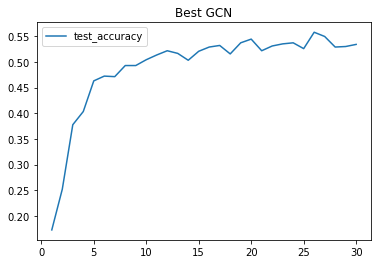

In [18]:
best = '../config/model_results/GCN_k_15/10/GCN_k15_object8.csv'
temp = pd.read_csv(best)
plt.plot(temp.epoch, temp.test_acc, label='test_accuracy')
plt.legend()
plt.title('Best GCN')

In [20]:
base = '../config/model_results/GCN_k_15/10/'
para_base = '../config/model_params/GCN_k_15/10/'
pool = []
ratio = []
lr = []
bs = []
address = []
for obj in os.listdir(base):
    param = para_base + obj[:-4] +'.json'
    with open(param, 'r') as file:
        title = json.load(file)
    temp = base + obj
    pool.append(title['pool'])
    ratio.append(title['ratio'])
    lr.append(title['lr'])
    bs.append(title['bs'])
    address.append(temp)

In [25]:
results = pd.DataFrame()
results['pool'] = pool
results['ratio'] = ratio
results['lr'] = lr
results['bs'] = bs
results['address'] = address
results['address'] = results.address.apply(lambda x: pd.read_csv(x).test_acc.tolist())

In [53]:
results

,pool,ratio,lr,bs,address
0,ASA,0.4,0.0010,32,"[0.1584362139917695, 0.1584362139917695, 0.158..."
1,SAG,0.6,0.0010,64,"[0.1378600823045267, 0.2201646090534979, 0.215..."
2,SAG,0.4,0.0005,32,"[0.1728395061728395, 0.2520576131687242, 0.377..."
3,ASA,0.4,0.0005,64,"[0.125514403292181, 0.125514403292181, 0.18827..."
4,SAG,0.6,0.0005,64,"[0.1738683127572016, 0.2304526748971193, 0.327..."
5,ASA,0.4,0.0005,32,"[0.2386831275720164, 0.2685185185185185, 0.326..."
6,ASA,0.6,0.0010,64,"[0.1121399176954732, 0.2530864197530864, 0.313..."
7,SAG,0.4,0.0010,32,"[0.1687242798353909, 0.1810699588477366, 0.193..."
8,ASA,0.6,0.0005,64,"[0.1275720164609053, 0.1923868312757201, 0.319..."
9,SAG,0.4,0.0005,64,"[0.1923868312757201, 0.2325102880658436, 0.305..."


Text(0.5, 1.0, 'SAGPooling(red) VS ASAPooling(Green)')

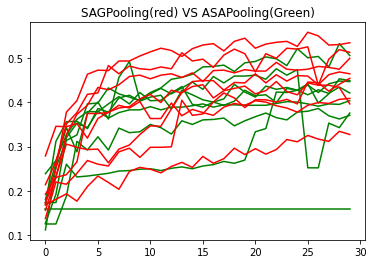

In [39]:
for asa in results[results.pool == 'ASA'].address:
    if len(asa) == 30:
        plt.plot(range(30), asa, color='green')
        
for sag in results[results.pool == 'SAG'].address:
    if len(sag) == 30:
        plt.plot(range(30), sag, color='red')
        
plt.title('SAGPooling(red) VS ASAPooling(Green)')

Text(0.5, 1.0, 'SAGPooling VS ASAPooling (Mean)')

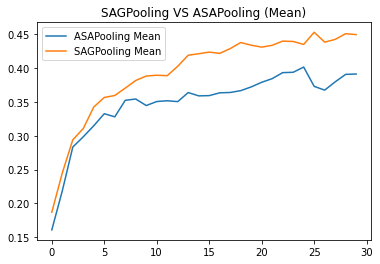

In [48]:
import numpy as np
asa_mean = []
temp = [x for x in results[results.pool == 'ASA'].address.to_list() if len(x) == 30]
for i in range(30):
    asa_mean.append(np.mean([x[i] for x in temp]))

    
sag_mean = []
temp = [x for x in results[results.pool == 'SAG'].address.to_list() if len(x) == 30]
for i in range(30):
    sag_mean.append(np.mean([x[i] for x in temp]))
    
plt.plot(range(30), asa_mean, label='ASAPooling Mean')
plt.plot(range(30), sag_mean, label='SAGPooling Mean')
plt.legend()
plt.title("SAGPooling VS ASAPooling (Mean)")

Text(0.5, 1.0, 'Ratio 0.6(red) VS Ratio 0.4(Green)')

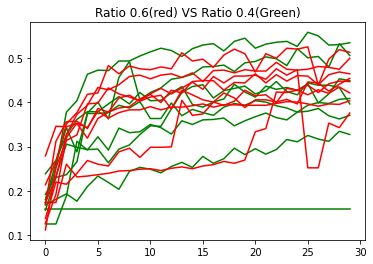

In [51]:
for asa in results[results.ratio == 0.4].address:
    if len(asa) == 30:
        plt.plot(range(30), asa, color='green')
        
for sag in results[results.ratio == 0.6].address:
    if len(sag) == 30:
        plt.plot(range(30), sag, color='red')
        
plt.title('Ratio 0.6(red) VS Ratio 0.4(Green)')

Text(0.5, 1.0, 'Ratio Compare')

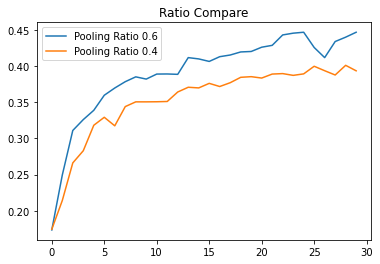

In [52]:
six_mean = []
temp = [x for x in results[results.ratio == 0.6].address.to_list() if len(x) == 30]
for i in range(30):
    six_mean.append(np.mean([x[i] for x in temp]))

    
four_mean = []
temp = [x for x in results[results.ratio == 0.4].address.to_list() if len(x) == 30]
for i in range(30):
    four_mean.append(np.mean([x[i] for x in temp]))
    
plt.plot(range(30), six_mean, label='Pooling Ratio 0.6')
plt.plot(range(30), four_mean, label='Pooling Ratio 0.4')
plt.legend()
plt.title("Ratio Compare")

Text(0.5, 1.0, 'Batch Size 64(red) VS Batch Size 32(Green)')

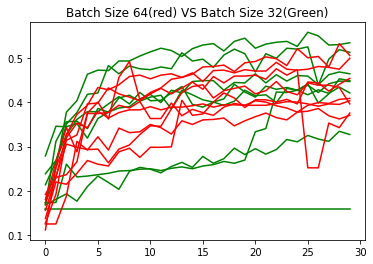

In [56]:
for asa in results[results.bs == 32].address:
    if len(asa) == 30:
        plt.plot(range(30), asa, color='green')
        
for sag in results[results.bs == 64].address:
    if len(sag) == 30:
        plt.plot(range(30), sag, color='red')
        
plt.title('Batch Size 64(red) VS Batch Size 32(Green)')

Text(0.5, 1.0, 'Batch Size Compare')

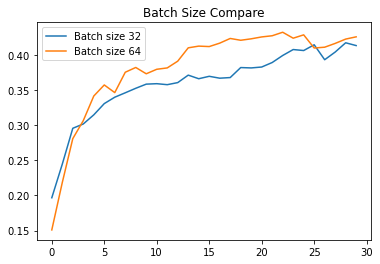

In [57]:
six_mean = []
temp = [x for x in results[results.bs == 32].address.to_list() if len(x) == 30]
for i in range(30):
    six_mean.append(np.mean([x[i] for x in temp]))

    
four_mean = []
temp = [x for x in results[results.bs == 64].address.to_list() if len(x) == 30]
for i in range(30):
    four_mean.append(np.mean([x[i] for x in temp]))
    
plt.plot(range(30), six_mean, label='Batch size 32')
plt.plot(range(30), four_mean, label='Batch size 64')
plt.legend()
plt.title("Batch Size Compare")

## Graph Construct Compare


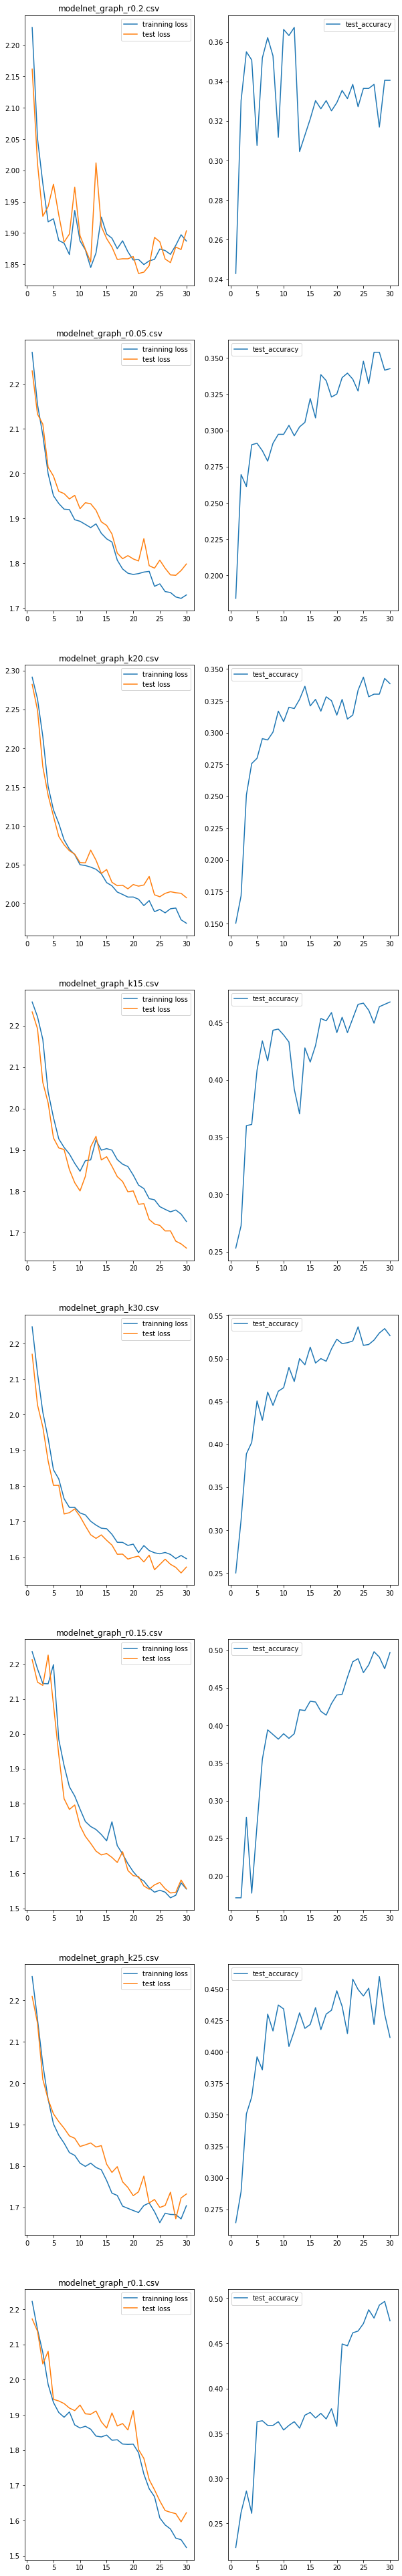

In [12]:
fig, ax = plt.subplots(8, 2, figsize=(10, 70))
base = '../config/model_results/'
i = 0
for obj in os.listdir(base):
    if obj != 'GCN_k_15' and obj != '.ipynb_checkpoints':
        title = obj
        temp = base + obj
        draw_loss(temp, ax[i][0], title)
        draw_acc(temp, ax[i][1], title)
        i+=1

Text(0.5, 1.0, 'Compare different graph construction')

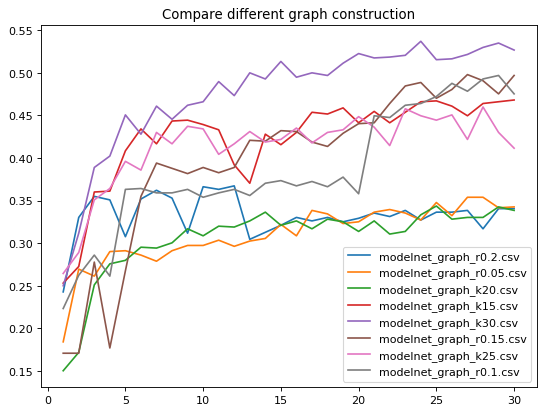

In [15]:
base = '../config/model_results/'
plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
for obj in os.listdir(base):
    if obj != 'GCN_k_15' and obj != '.ipynb_checkpoints':
        title = obj
        temp = base + obj
        temp = pd.read_csv(temp)
        plt.plot(temp.epoch, temp.test_acc, label=obj)
plt.legend()
plt.title("Compare different graph construction")

Text(0.5, 1.0, 'compare KNN and Fix-radiu')

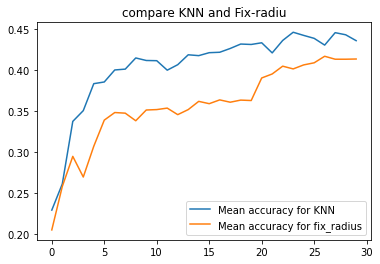

In [16]:
k = []
r = []
for obj in os.listdir(base):
    if obj != 'GCN_k_15' and obj != '.ipynb_checkpoints':
        temp = base + obj
        temp = pd.read_csv(temp)
        if 'k' in obj:
            k.append(temp.test_acc.tolist())
        else:
            r.append(temp.test_acc.tolist())
            
k_mean = []
r_mean = []
for i in range(30):
    k_mean.append(np.mean([x[i] for x in k]))
    r_mean.append(np.mean([x[i] for x in r]))
    
plt.plot(range(30), k_mean, label="Mean accuracy for KNN")
plt.plot(range(30), r_mean, label="Mean accuracy for fix_radius")
plt.legend()
plt.title('compare KNN and Fix-radiu')

## Confusion Matrix

In [8]:
from src import graph_dataset
from src import graph_model

from src import pointnet_model
from src import pointnet_data
import torch
import torch.nn as nn

In [6]:
base = '../data/modelnet/modelnet_graph_k30/'
paths = []
labels = []
for obj in os.listdir(base):
    temp = base + obj
    for file in os.listdir(temp):
        if obj in ['sofa', 'airplane', 'vase', 'chair', 'toilet', 'bookshelf', 'bed', 'monitor', 'piano', 'bottle']:
            paths.append(temp+'/' + file)
            labels.append(obj)

In [9]:
dataset = pointnet_data.Pointdata(paths, labels)
pt_dataset, test_dataset = torch.utils.data.random_split(dataset, [4862, 0])

In [11]:
dataset = graph_dataset.GCNdata(paths, labels)
g_dataset, test_dataset = torch.utils.data.random_split(dataset, [4862, 0])

In [19]:
loader = torch.utils.data.DataLoader(dataset=g_dataset,
                                                       batch_size=1,
                                                       shuffle=False)

In [26]:
g_model = graph_model.GCN(pool='SAG', ratio = 0.4, class_num = 10)
pt_model = torch.load('../trained_models/pointnet.pt')

g_model.load_state_dict(torch.load('../trained_models/modelnet_graph_k30.pt'))

<All keys matched successfully>

In [23]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [30]:
nb_classes = 10

confusion_matrix_g = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs,edges, weights, classes) in enumerate(loader):
        #inputs = inputs.to(device)
        outputs = g_model(inputs, edges, weights)
        _, preds = torch.max(outputs, 1)  
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix_g[t.long(), p.long()] += 1

print(confusion_matrix_g)

tensor([[591.,   0.,   1.,   4.,  49.,  31.,  23.,  11.,   0.,  16.],
        [ 98.,   0.,  32.,   6., 162.,  46.,   5.,  34.,  60.,  14.],
        [ 32.,   0.,  81.,   6.,  35.,   8.,   9., 139.,   6.,  17.],
        [ 15.,   0.,   0., 214.,  12.,   9.,   5.,  10.,   1.,  92.],
        [ 92.,   0.,   5.,   1., 597.,  28.,   2.,  45.,  90.,   8.],
        [ 95.,   0.,   3.,  13.,  65., 132.,  21.,  18.,   3.,  26.],
        [ 22.,   0.,  12.,  15.,  71.,   4.,  87.,  43.,  21.,  33.],
        [ 32.,   0.,  44.,   2.,  41.,  13.,  13., 435.,  10.,  10.],
        [ 25.,   0.,   0.,   6., 115.,   8.,  11.,  27., 168.,  34.],
        [ 21.,   0.,   2., 132.,  29.,   7.,   9.,  18.,   3., 221.]])


In [31]:
nb_classes = 10

confusion_matrix_pt = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs,edges, weights, classes) in enumerate(loader):
        inputs = inputs.to(device)
        outputs = pt_model(inputs)
        _, preds = torch.max(outputs, 1)     
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix_pt[t.long(), p.long()] += 1

print(confusion_matrix_pt)

tensor([[669.,   2.,  10.,   0.,   0.,   0.,  14.,   4.,  13.,  14.],
        [  1., 432.,  14.,   0.,   0.,   0.,   1.,   6.,   3.,   0.],
        [  2.,  21., 290.,   0.,   0.,   0.,   9.,   9.,   1.,   1.],
        [  3.,   2.,   2., 308.,   0.,   0.,   6.,   0.,   1.,  36.],
        [635., 154.,   8.,   1.,   0.,   0.,  15.,   4.,  41.,  10.],
        [319.,   7.,  18.,   2.,   0.,   0.,  10.,   9.,   1.,  10.],
        [  4.,   4.,   8.,   0.,   0.,   0., 279.,   7.,   4.,   2.],
        [  0.,   1.,   3.,   0.,   0.,   0.,   0., 596.,   0.,   0.],
        [  0.,   0.,   1.,   0.,   0.,   0.,   1.,   0., 389.,   3.],
        [  2.,   0.,   8.,  11.,   0.,   0.,   2.,   2.,   0., 417.]])


In [34]:
cf_g = confusion_matrix_g.detach().numpy()
cf_pt = confusion_matrix_pt.detach().numpy()

Text(0.5, 1.0, 'Confusion Matrix for GCN')

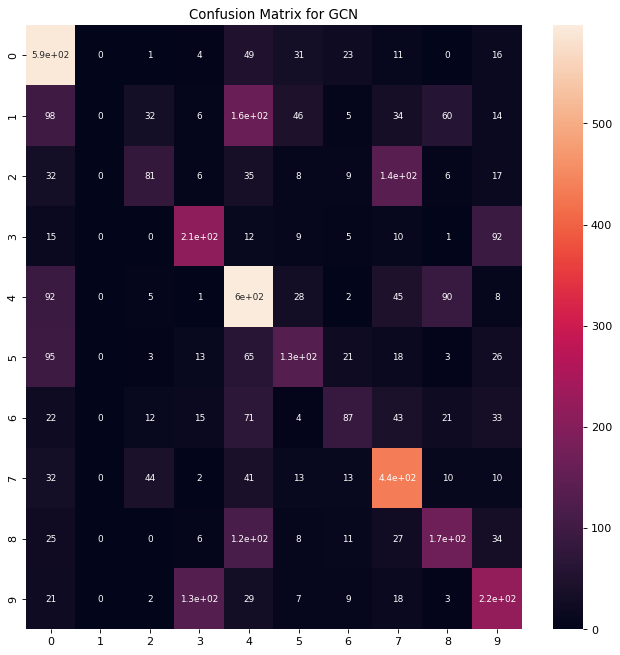

In [42]:
import seaborn as sn
plt.figure(figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
sn.heatmap(cf_g, annot=True, annot_kws={"size": 8})
plt.title("Confusion Matrix for GCN")

Text(0.5, 1.0, 'Confusion Matrix for PointNet')

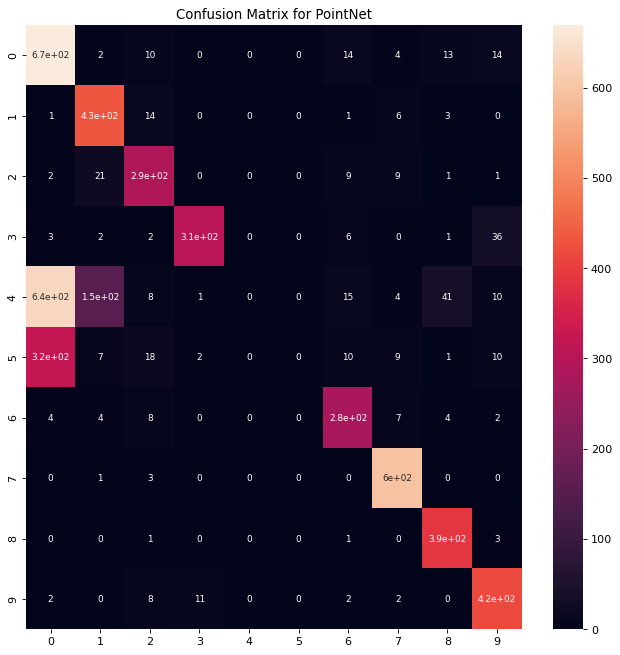

In [43]:
plt.figure(figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
sn.heatmap(cf_pt, annot=True, annot_kws={"size": 8})
plt.title("Confusion Matrix for PointNet")